## Загрузка и изучение данные

In [34]:
#импортируем нужные нам библиотеки 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#импортируем датасет load_wine из библиотеки scikit-learn
from sklearn.datasets import load_wine

In [35]:
# загружаем датасет load_wine в переменную wine_data
wine_data = load_wine()

In [36]:
# выводим список ключей
print(wine_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [37]:
#выводим информацию о датасете
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [38]:
#выводим названия классов
#видим что у нас есть 3 класса: class_0, class_1, class_2
print(wine_data['target_names'])

['class_0' 'class_1' 'class_2']


In [39]:
#выводим названия признаков датасета
print(wine_data['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [40]:
#выводим количество признаков
num_features = wine_data.data.shape[1]
print(f"Количество признаков: {num_features}")

Количество признаков: 13


In [41]:
#создали объект DataFrame из данных датасета 
#используя команду head() выводим первые нескольких, чтобы увидеть, как данные выглядят.
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [42]:
#или же можно будет вывести данные в таком виде
print(wine_df.iloc[0])

alcohol                           14.23
malic_acid                         1.71
ash                                2.43
alcalinity_of_ash                 15.60
magnesium                        127.00
total_phenols                      2.80
flavanoids                         3.06
nonflavanoid_phenols               0.28
proanthocyanins                    2.29
color_intensity                    5.64
hue                                1.04
od280/od315_of_diluted_wines       3.92
proline                         1065.00
Name: 0, dtype: float64


In [43]:
#данный код дает нам информацию о размерности данных в датасете
#Первое значение - количество примеров в датасете.
#Второе значение - количество признаков в каждом примере.
print(wine_data['data'].shape)

(178, 13)


In [44]:
#вывод массива меток классов.
#Этот массив содержит метки классов, где каждое значение соответствует классу примера данных из массива 
print(wine_data['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [45]:
#провреяем количесво пропущенных значений, чтобы позже мы могли работать с данными
#результат равен нулю для всех столбцов, это означает, что в данных нет пропущенных значений, и данные полные
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

## Метрики эффективности: обучающий и тестовые наборы

In [46]:
#импортируем функцию train_test_split из библиотеки scikit-learn для разделения данных на обучающий и тестовый наборы случайным образом.
#размер тестового набора - 25% 

#Обучающий набор обучает модели, а тестовый набор используется для тестирования ее производительности.

#X_train: Это матрица наборов для обучения.                   X_test: Это матрица наборов для теста.
#y_train: Это массив меток классов для обучающего набора.     y_test: Это массив меток классов для тестового набора.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, new_data_target, test_size=0.2, random_state=0)


In [47]:
#можем посмотреть на количество наборов для обучения и для тестирования
print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


## Исследование данных. Визуализация

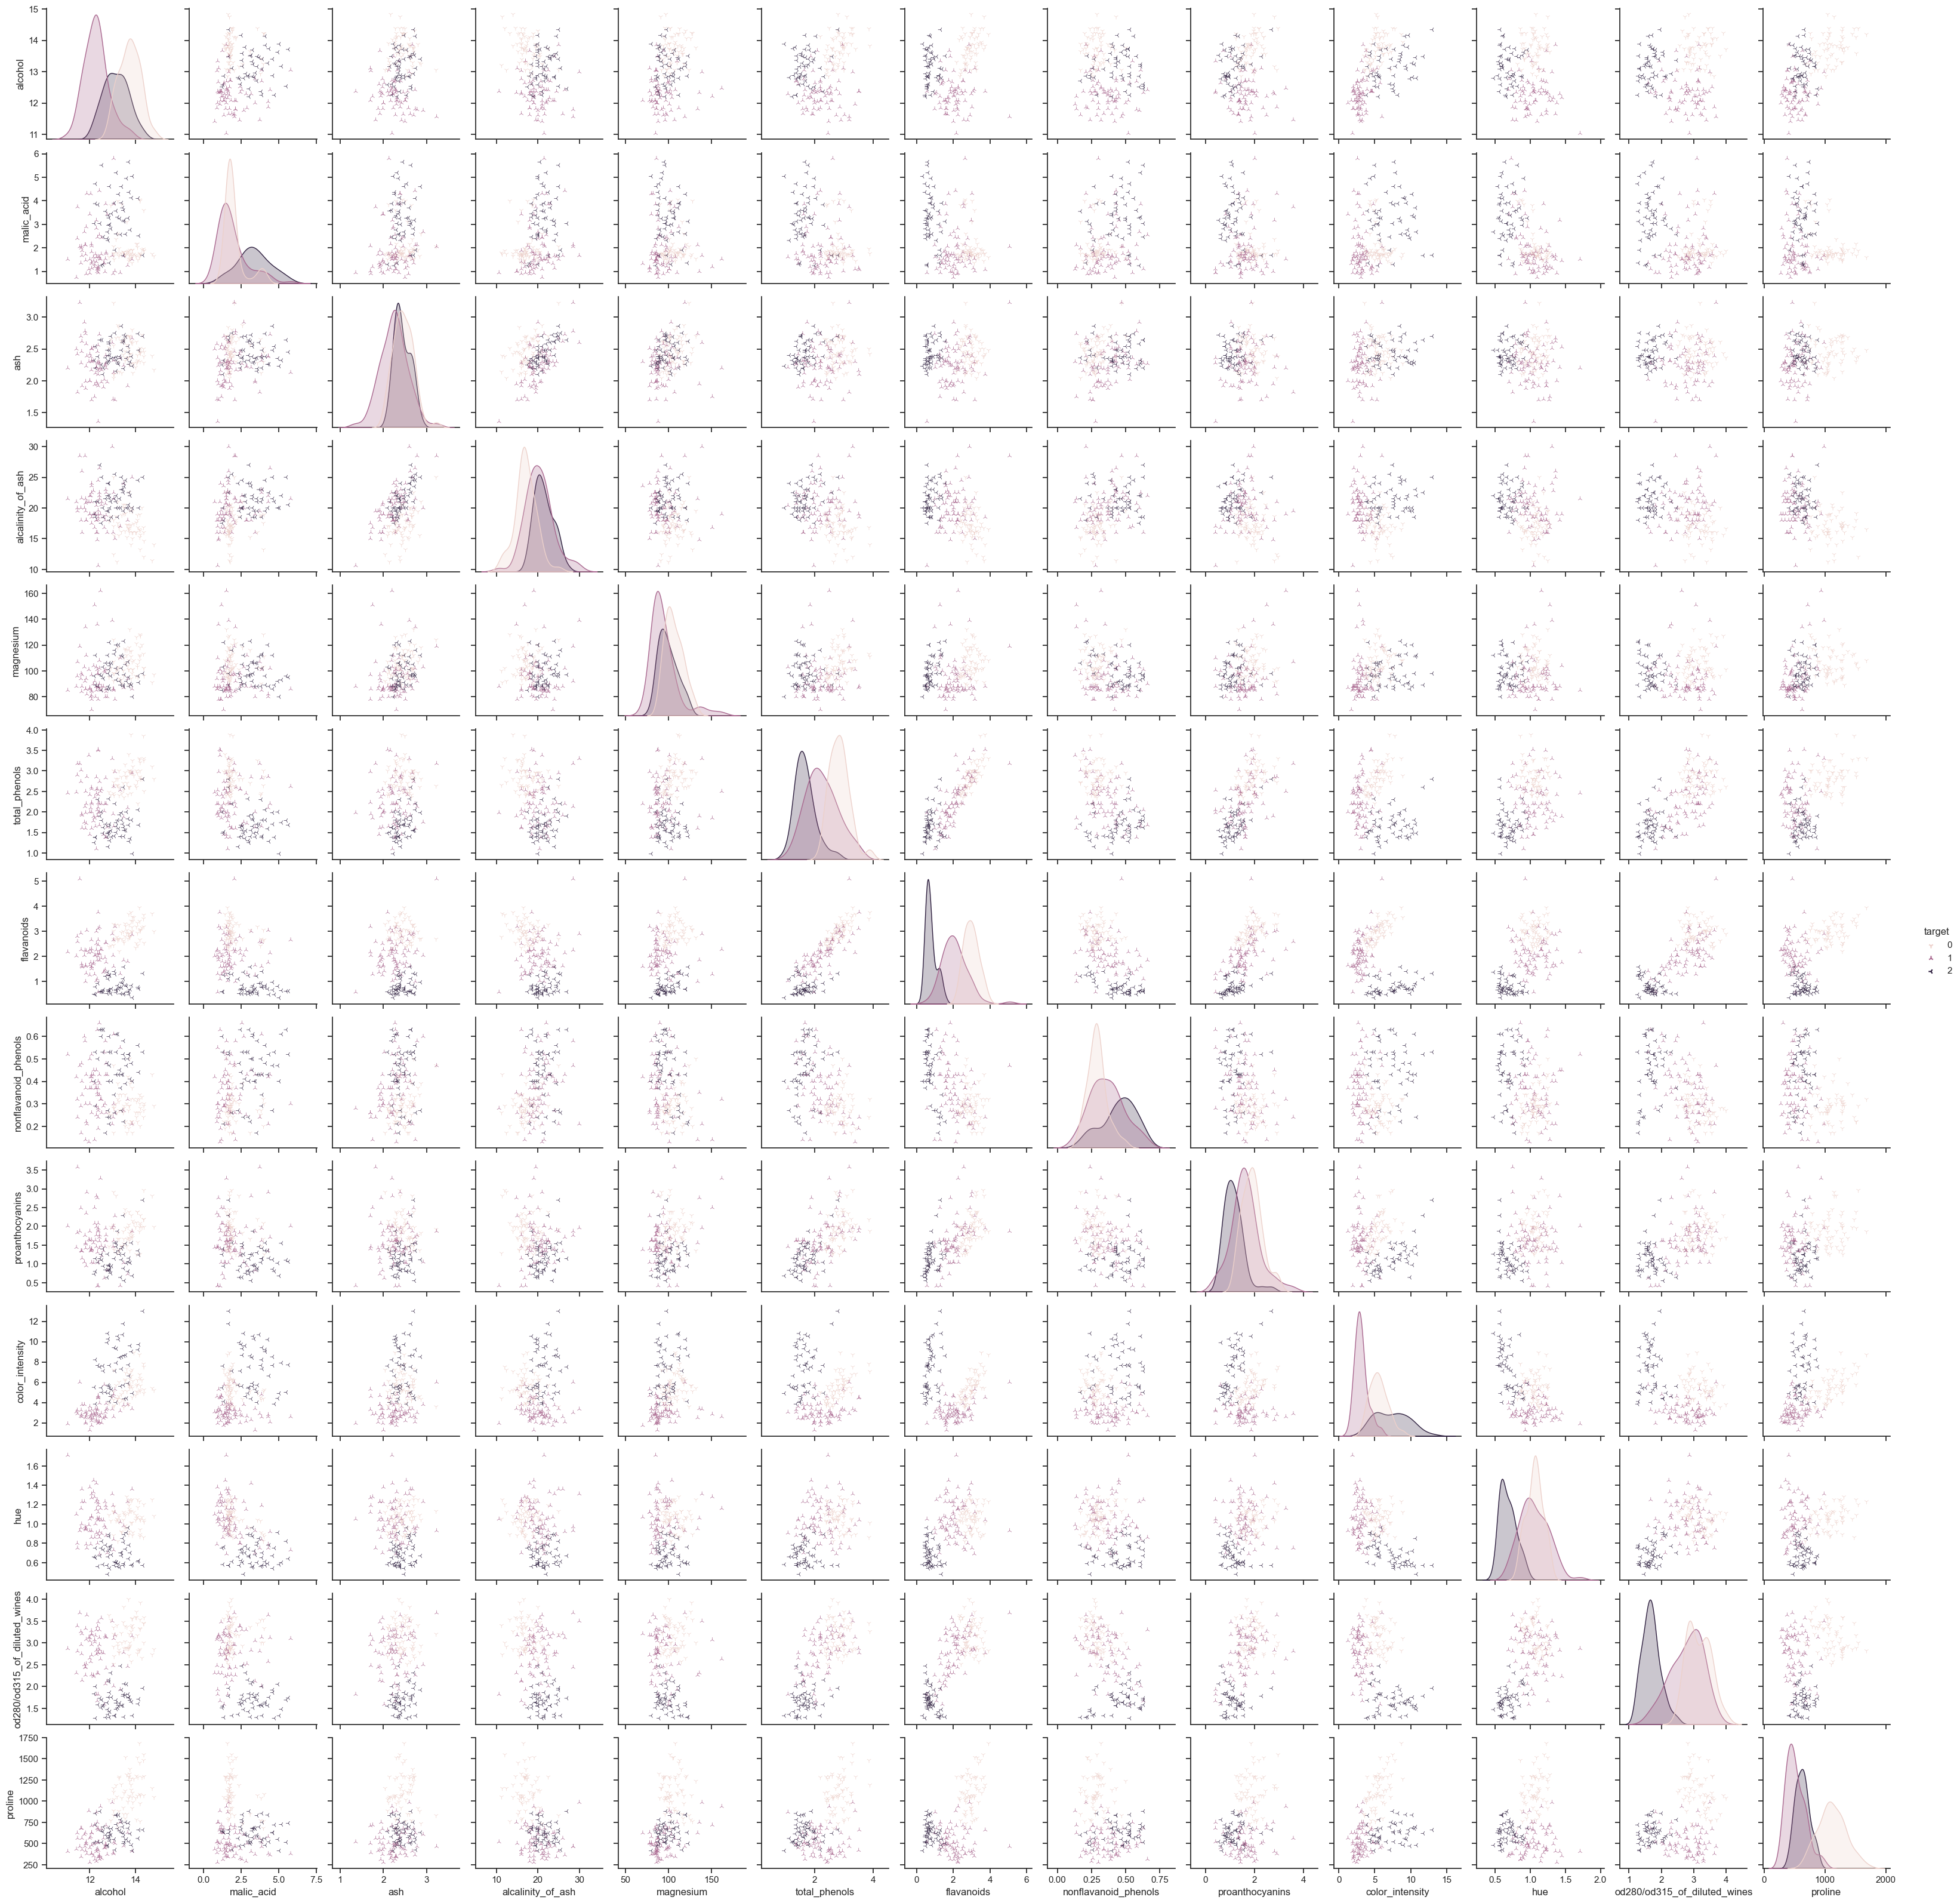

In [33]:
# создаем матрицу диаграмм для визуализации данных
X = wine_data.data
y = wine_data.target

wine_df = pd.DataFrame(data=X, columns=wine_data.feature_names)
wine_df['target'] = y

sns.set(style="ticks")
sns.pairplot(wine_df, hue="target", markers=["1", "2", "3"])

plt.show()

## Построение модели методом k-ближайших средних

In [49]:
#создаем модель классификации k-ближайших соседей с параметром n_neighbors=1, 
#что означает что она будет осуществлять классификацию, опираясь только на 1 ближайший сосед
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)

In [50]:
# fit - метод, который обучает модель KNN на обучающих данных
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
# В этом коде производится предсказание класса для X_new, с использованием KNN.
# видим, что даный пример является классом 1,означает что он является вино первого класса
X_new = np.array([[10.0, 1.0, 0.0, 8.0,0.4,0.0,25.0,0.33,0.60,10.0, 0.80, 0.0, 0.0, ]])
print(len(X_new[0]))
p =knn.predict(X_new)
print(p, wine_data['target_names'][p])

13
[1] ['class_1']


In [52]:
#предсказываем  тестовый наборе данных с использованием KNN
#видим результат нашего предсказания
y_pred = knn.predict(X_test)
print(len(y_pred))
print((y_pred))

36
[1 0 1 0 2 0 1 1 2 0 2 0 2 0 0 2 1 1 0 1 0 0 1 2 2 1 2 0 2 1 1 0 2 2 1 1]


In [53]:
#оцениваем точность (accuracy) модели, то есть процент правильных предсказаний.
print(np.mean(y_pred == y_test))

0.7777777777777778


### После проведенного тестирования модели я получила удовлетворительные результаты. Наша модель продемонстрировала точность прогнозов на уровне 77%, что говорит о ее способности делать правильные предсказания в более чем трех четвертях случаев. Хотя и есть место для улучшений, эти результаты уже подтверждают потенциал данной модели для решения задач и предсказаний в этой области.